# Cannon_collect_trainingset

This routine is collecting the data from the training set run

Author(s): Sven Buder

History:
171020: SB Create file

In [1]:
# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    import matplotlib.pyplot as plt
except:
    import matplotlib.pyplot as plt
    #matplotlib.use('Agg')

# Basic packages
import numpy as np
import scipy
import os
import sys
import glob
import pickle

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from scipy.io.idl import readsav

# Matplotlib associated packages for plotting
params = {
    'font.family'        : 'lmodern',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

from matplotlib.colors import ListedColormap
parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]

# Import isochrone package to plot isochrones
try:
    from isochrones.dartmouth import Dartmouth_Isochrone
    dart = Dartmouth_Isochrone()
    from isochrones import Isochrone
except:
    print('Could not load isochrones package')
    
# Package to save multiple PDF pages in one PDF
from matplotlib.backends.backend_pdf import PdfPages

Could not load isochrones package


In [2]:
# Change Work directory (if Sven's computer)
try:
    localFilePath = '/shared-storage/buder/svn-repos/trunk/GALAH/'
    os.chdir(localFilePath)
    print('Current working directory: '+os.getcwd())
except:
    try:
        localFilePath = '/avatar/buder/trunk/GALAH/'
        os.chdir(localFilePath)
        print('Current working directory: '+os.getcwd())
    except:
        print('Could not change Path to '+localFilePath)

Current working directory: /avatar/buder/trunk/GALAH


In [3]:
tex_dict = dict(
    wave_ccd1 = r'$\lambda$ (CCD1) [$\mathrm{\AA}$]',
    wave_ccd2 = r'$\lambda$ (CCD2) [$\mathrm{\AA}$]',
    wave_ccd3 = r'$\lambda$ (CCD3) [$\mathrm{\AA}$]',
    wave_ccd4 = r'$\lambda$ (CCD4) [$\mathrm{\AA}$]',
    wave      = r'$\lambda$ [$\mathrm{\AA}$]',
    norm_flux = r'$\mathrm{Flux~[norm]}$',
    Teff      = r'$T_\mathrm{eff}~\mathrm{[K]}$',
    Logg      = r'$\log g~\mathrm{[dex]}$',
    Fe_H      = r'$\mathrm{[Fe/H]~[dex]}$',
    M_H       = r'$\mathrm{[M/H]~[dex]}$',
    Vmic      = r'$v_\mathrm{mic}~\mathrm{[km/s]}$',
    Vsini     = r'$v_\mathrm{broad}~\mathrm{[km/s]}$',
    Ak        = r'$A_{K_S}~\mathrm{[mag]}$',
    Alpha_Fe  = r'$\mathrm{[\alpha/Fe]~[dex]}$',
    XFe       = r'$\mathrm{[X/Fe]~[dex]}$',
    SNR       = r'$\mathrm{Green~Channel~S/N}$',
    Li        = r'$\mathrm{[Li/Fe]~[dex]}$',
    C         = r'$\mathrm{[C/Fe]~[dex]}$',
    O         = r'$\mathrm{[O/Fe]~[dex]}$',
    Na        = r'$\mathrm{[Na/Fe]~[dex]}$',
    Mg        = r'$\mathrm{[Mg/Fe]~[dex]}$',
    Al        = r'$\mathrm{[Al/Fe]~[dex]}$',
    Si        = r'$\mathrm{[Si/Fe]~[dex]}$',
    K         = r'$\mathrm{[K/Fe]~[dex]}$',
    Ca        = r'$\mathrm{[Ca/Fe]~[dex]}$',
    Sc        = r'$\mathrm{[Sc/Fe]~[dex]}$',
    Ti        = r'$\mathrm{[Ti/Fe]~[dex]}$',
    V         = r'$\mathrm{[V/Fe]~[dex]}$',
    Cr        = r'$\mathrm{[Cr/Fe]~[dex]}$',
    Mn        = r'$\mathrm{[Mn/Fe]~[dex]}$',
    Co        = r'$\mathrm{[Co/Fe]~[dex]}$',
    Ni        = r'$\mathrm{[Ni/Fe]~[dex]}$',
    Cu        = r'$\mathrm{[Cu/Fe]~[dex]}$',
    Zn        = r'$\mathrm{[Zn/Fe]~[dex]}$',
    Rb        = r'$\mathrm{[Rb/Fe]~[dex]}$',
    Sr        = r'$\mathrm{[Sr/Fe]~[dex]}$',
    Y         = r'$\mathrm{[Y/Fe]~[dex]}$',
    Zr        = r'$\mathrm{[Zr/Fe]~[dex]}$',
    Mo        = r'$\mathrm{[Mo/Fe]~[dex]}$',
    Ru        = r'$\mathrm{[Ru/Fe]~[dex]}$',
    Ba        = r'$\mathrm{[Ba/Fe]~[dex]}$',
    La        = r'$\mathrm{[La/Fe]~[dex]}$',
    Ce        = r'$\mathrm{[Ce/Fe]~[dex]}$',
    Nd        = r'$\mathrm{[Nd/Fe]~[dex]}$',
    Sm        = r'$\mathrm{[Sm/Fe]~[dex]}$',
    Eu        = r'$\mathrm{[Eu/Fe]~[dex]}$'
    )

In [4]:
def export_fits(dictionary, filename):
    """
    This is a function to export a datastructure, nomatter where you currently are
    
    INPUT:
    dictionary : dictionary data_structure
    filename   : how should the file be called? Best: include the full path
    
    OUTPUT:
    FITS file saved as filename
    """
    
    t = table.Table()
    for each_key in dictionary.keys():
        t.add_column(table.Column(name=each_key, data=dictionary[each_key]))
    t.write(filename+'.fits',overwrite=True)

In [5]:
def create_galah_dict(wg3_wg4_setup):
    galah_dict = dict(

        # General
        sobject_id  = 112233000001234,
        galah_id    = 1234567,
        field_id    = 0,
        ra          = 0.0,
        dec         = 0.0,
        ebv         = 0.0,
        snr_c1_iraf = 0.0,
        snr_c2_iraf = 0.0,
        snr_c3_iraf = 0.0,
        snr_c4_iraf = 0.0,
        teff_guess  = 0.0,
        logg_guess  = 0.0,
        feh_guess   = 0.0,
        rv_guess    = 0.0,
        e_rv_guess  = 0.0,
        flag_guess  = 0.0,

        # General SME
        trained_on     = 0,
        rv_sme         = 0.0,
        e_rv_sme       = 0.0,
        Alpha_Fe_sme   = 0.0,
        e_Alpha_Fe_sme = 0.0,

        # General Cannon
        chi2_cannon       = 0.0,
        sp_label_distance = 0.0,
        flag_cannon       = 0,
        Alpha_Fe_cannon   = 0.0,
        e_Alpha_Fe_cannon = 0.0
        )

    for each_method in ['sme','cannon']:
        for each_sp in wg3_wg4_setup['stellar_parameters']:
            galah_dict[each_sp+'_'+each_method] = 0.0
            galah_dict['e_'+each_sp+'_'+each_method] = 0.0

        for each_elem in wg3_wg4_setup['elements']:
            galah_dict[each_elem+'_abund_'+each_method]         = 0.0
            galah_dict['e_'+each_elem+'_abund_'+each_method]    = 0.0
            galah_dict['ld_'+each_elem+'_abund_'+each_method]   = 0.0
            galah_dict['flag_'+each_elem+'_abund_'+each_method] = 0
            
    return galah_dict

In [6]:
def read_model_pickle(filename):
    """
    INPUT:
    
    filename : pickle filename path
    
    OUTPUT:
    pickle file structure
    
    """
    door = open(filename,'r')
    print('Will read pickle file: '+filename)
    model_data = pickle.load(door)
    return model_data

In [7]:
def plot_isochrones(ax=plt.gca):
    try:
        for each in np.arange(1,11):
            dart_iso = Isochrone.isochrone(dart,age=np.log10(each*10**9.),feh=0.0,dm=0.001)
            dart_iso1_1, = ax.plot(dart_iso.Teff,dart_iso.logg,color='grey',lw=0.5,alpha=0.75)
        dart_iso = Isochrone.isochrone(dart,age=np.log10(10*10**9.),feh=-1.0,dm=0.001)
        dart_iso1_2, = ax.plot(dart_iso.Teff,dart_iso.logg,color='grey',ls='dotted',lw=2,alpha=0.75)
        dart_iso = Isochrone.isochrone(dart,age=np.log10(10*10**9.),feh=+0.5,dm=0.001)
        ax.plot(dart_iso.Teff,dart_iso.logg,color='grey',ls='dotted',lw=2,alpha=0.75)
    except:
        print('Could not plot isochrones')

In [8]:
def plot_contours(X, Y, xlim, ylim, ax=plt.gca):
    XY_good = (np.isfinite(X) & np.isfinite(Y))
    H, xedges, yedges = np.histogram2d(Y[XY_good],X[XY_good], range=[(ylim[-1],ylim[0]), (xlim[-1],xlim[0])], bins=(100, 100))
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    plt.subplots_adjust(bottom=0.15, left=0.15)
    levels = (5,10,30)
    cset = ax.contour(H, levels, colors=['black','black','black'],linewidths=(0.25, 0.5,1.),extent=extent,zorder=10)

In [9]:
def plot_HRD(dictionary, sme_cannon='cannon', savefig=False, xlim=(7900,3600), ylim=(5.,0.)):
    HRD_kwargs = dict(cmap=parula, s=20, lw=0.1, rasterized=True)
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(2*6.4, 4.8))

    s1 = ax1.scatter(dictionary['Teff_'+sme_cannon],dictionary['Logg_'+sme_cannon],c=dictionary['Fe_H_'+sme_cannon], vmin=-2.5, vmax=0.5,**HRD_kwargs)
    ax1.set_xlabel(tex_dict['Teff'])
    ax1.set_ylabel(tex_dict['Logg'])
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label(tex_dict['Fe_H'])
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    
    s2 = ax2.scatter(dictionary['Teff_'+sme_cannon],dictionary['Logg_'+sme_cannon],c=dictionary['snr_c2_iraf'], vmin=25, vmax=160,**HRD_kwargs)
    ax2.set_xlabel(tex_dict['Teff'])
    ax2.set_ylabel(tex_dict['Logg'])
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label(tex_dict['SNR'])
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)

    plt.tight_layout()
    if savefig!=False:
        plt.savefig(savefig+'.pdf', dpi=300)

In [10]:
def ab_scatter(X, Y, ax=plt.gca, **kwargs):
    """
    This function gives back a scatter plot
    
    """

    c = kwargs.get('c',parula_zero)
    s = kwargs.get('s',2)
    s1 = ax.scatter(X,Y,c=c,s=s,alpha=0.5,rasterized=True)
    
    return ax

def ab_dens2d(X, Y, ax=plt.gca, min_per_bin=5, zeroslines=True, interimlines=True, colorbar=True, **kwargs):
    """
    This function gives back a 2D density plot 
    of the data put in as X and Y with 
    all points as scatter below certain density
    
    """
    
    #first make sure to only use finite X and Y values
    XY_finite = (np.isfinite(X) & np.isfinite(Y))
    X = X[XY_finite]
    Y = Y[XY_finite]
    
    # General kwargs:
    xlabel = kwargs.get('xlabel','')
    ylabel = kwargs.get('ylabel', r'$\mathrm{[X/Fes]~[dex]}$')
    xlim   = kwargs.get('xlim', (-3.0,0.65))
    ylim   = kwargs.get('ylim', (-0.5,1.00))
    cmap = kwargs.get('cmap', parula)
    bins = kwargs.get('bins', (0.05,0.025))
    if np.shape(bins) != ():
        # assuming input in dex
        bins = [np.arange(xlim[0],xlim[1],bins[0]),np.arange(ylim[0],ylim[1],bins[1])]
    
    # plot all points as scatter before density structure is overlaid
    scatter = ab_scatter(X,Y,ax=ax)

    H, xedges, yedges = np.histogram2d(X,Y,bins=bins)
    H=np.rot90(H)
    H=np.flipud(H)
    Hmasked = np.ma.masked_where(H<min_per_bin,H)

    dens2d=ax.pcolormesh(xedges,yedges,Hmasked,cmap=cmap)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    xticks = kwargs.get('xticks',ax.get_xticks())
    ax.set_xticks(xticks)
    
    if zeroslines == True:
        ax.axhline(0,c='k',lw=0.5)
        ax.axvline(0,c='k',lw=0.5)
        
    if interimlines == True:
        ax.axhline(0.1,c='k',linestyle='--')
        ax.axhline(0.2,c='k',linestyle='--')
        ax.axhline(0.3,c='k',linestyle='--')
        ax.axhline(0.4,c='k',linestyle='--')
        ax.axhline(0.5,c='k',linestyle='--')
        ax.axhline(-0.1,c='k',linestyle='--')
        ax.axhline(-0.2,c='k',linestyle='--')

    if colorbar == True:
        c = plt.colorbar(dens2d,ax=ax)
        c.set_label('Counts')

In [11]:
def plot_SME_Cannon_HRD(dictionary, savefig=False, xlim=(7900,3600), ylim=(5.,0.)):
    """
    This routine plots 2 subplots with the SME HRD on the left and the Cannon HRD on the right
    
    INPUT:
    dictionary : with keywords 
                 Teff_sme, Logg_sme, Fe_H_sme as well as Teff_cannon, Logg_cannon, Fe_H_cannon   
    
    """
    HRD_kwargs = dict(cmap=parula, s=10, lw=0.1, rasterized=True)
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(2*6.4, 4.8))

    plot_isochrones(ax=ax1)
    plot_isochrones(ax=ax2)
    
    s1 = ax1.scatter(dictionary['Teff_sme'],dictionary['Logg_sme'],c=dictionary['Fe_H_sme'], vmin=-2.5, vmax=0.5,**HRD_kwargs)
    ax1.set_xlabel(tex_dict['Teff']+r' SME')
    ax1.set_ylabel(tex_dict['Logg']+r' SME')
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label(tex_dict['Fe_H']+r' SME')
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)

    plot_contours(dictionary['Teff_sme'], dictionary['Logg_sme'], xlim=xlim, ylim=ylim, ax=ax1)
    plot_contours(dictionary['Teff_cannon'], dictionary['Logg_cannon'], xlim=xlim, ylim=ylim, ax=ax2)
    
    s2 = ax2.scatter(dictionary['Teff_cannon'],dictionary['Logg_cannon'],c=dictionary['Fe_H_cannon'], vmin=-2.5, vmax=0.5,**HRD_kwargs)
    ax2.set_xlabel(tex_dict['Teff']+r' The Cannon')
    ax2.set_ylabel(tex_dict['Logg']+r' The Cannon')
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label(tex_dict['Fe_H']+r' The Cannon')
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)

    plt.tight_layout()
    if savefig!=False:
        plt.savefig(savefig+'.pdf', dpi=300)

In [12]:
def compute_Alpha_Fe(data_structure,sme_cannon='cannon',alpha_elements=['Mg','Si','Ca','Ti']):
    """
    INPUT:
    
    data_structure : Structure, from which the alpha-process elements come from
                     This structure also has to have the keys 
                     'Alpha_Fe_'+sme_cannon and 'e_Alpha_Fe_'+sme_cannon
    sme_cannon     : 'sme' or 'cannon' which will be use as key within data_structure
                     default: 'cannon'
    alpha_elements : the array including which alpha-process elements shall be included
                     default: ['Mg','Si','Ca','Ti']
    
    OUTPUT:
    
    None, but the following entries will be filled:
    data_structure['Alpha_Fe_'+sme_cannon] & data_structure['e_Alpha_Fe_'+sme_cannon] 
    
    """
    for each_sobject_id in range(len(data_structure['sobject_id'])):

        
        combi = np.nansum(np.concatenate([(data_structure[x+'_abund_'+sme_cannon][each_sobject_id]/data_structure['e_'+x+'_abund_'+sme_cannon][each_sobject_id]**2.)[(np.isfinite(data_structure[x+'_abund_'+sme_cannon][each_sobject_id]) & (data_structure['flag_'+x+'_abund_'+sme_cannon][each_sobject_id] == 0))] for x in alpha_elements]))/np.nansum(np.concatenate([1./data_structure['e_'+x+'_abund_'+sme_cannon][each_sobject_id][np.isfinite(data_structure[x+'_abund_'+sme_cannon][each_sobject_id]) & (data_structure['flag_'+x+'_abund_'+sme_cannon][each_sobject_id] == 0)]**2. for x in alpha_elements]))
        e_combi = np.sqrt(1./np.nansum(np.concatenate([1./(data_structure['e_'+x+'_abund_'+sme_cannon][each_sobject_id])[np.isfinite(data_structure[x+'_abund_'+sme_cannon][each_sobject_id]) & (data_structure['flag_'+x+'_abund_'+sme_cannon][each_sobject_id] == 0)]**2. for x in alpha_elements])))

        if np.isfinite(combi):
            data_structure['Alpha_Fe_'+sme_cannon][each_sobject_id] = combi
            data_structure['e_Alpha_Fe_'+sme_cannon][each_sobject_id] = e_combi

In [13]:
def plot_alpha(dictionary, sme_cannon='cannon', savefig=False, xlim=(-3.0,0.65), ylim=(-0.5,1.00)):
    
    interimlines = False#True

    plt.figure(figsize=(15,5))
    for each,mode in enumerate(['Alpha_Fe','O','Mg','Si','Ca','Ti']):
        ax = plt.subplot(2,3,each+1)
        if each == 0:
            X = dictionary['Fe_H_'+sme_cannon]
            Y = dictionary['Alpha_Fe_'+sme_cannon]
        else:
            good = dictionary['flag_'+mode+'_abund_'+sme_cannon] == 0
            X = dictionary['Fe_H_'+sme_cannon][good]
            Y = dictionary[mode+'_abund_'+sme_cannon][good]
        ab_dens2d(
            ax=ax,
            xlim=xlim,
            ylim=ylim,
            bins=(0.1,0.05),
            X = X,
            Y = Y,
            xlabel='',
            ylabel='',
            interimlines=interimlines
            );
        ax.text(0.05,0.1,tex_dict[mode],transform=ax.transAxes)
        if each in [0,3]:
            ax.set_ylabel(tex_dict['XFe'])
        if each < 3:
            ax.set_xticks([])
        if each > 2:
            ax.set_xlabel(tex_dict['Fe_H'])
        ax.set_xticks(ax.get_xticks()[::2])
        ax.set_yticks(ax.get_yticks()[::2])
    plt.tight_layout()

    if savefig!=False:
        plt.savefig(savefig+'.pdf', dpi=300)

## The class 'trainingset', where we want to put in all important data and routines

In [14]:
class trainingset(object):
    """ 
    trainingset is the major class for the important information on the trainingset.
    
    In the future, this should be executable without the trainingset class
    
    Initialise with:
    wg3_wg4_setup : setup dictionary with all relevant data for IRAF/SME/CANNON
    
    """
    
    def __init__(self, wg3_wg4_setup):
        os.chdir(localFilePath)
        if not hasattr(self,'galah_dict'):
            self.galah_dict = create_galah_dict(wg3_wg4_setup)
        self.version_cannon     = wg3_wg4_setup['version_cannon']
        self.setup_cannon       = wg3_wg4_setup['setup_cannon']
        self.nr_ccds_cannon     = wg3_wg4_setup['nr_ccds_cannon']
        self.version_reduction  = wg3_wg4_setup['version_reduction']
        self.reduction_DR       = wg3_wg4_setup['reduction_DR']
        self.version_sme        = wg3_wg4_setup['version_sme']
        self.stellar_parameters = wg3_wg4_setup['stellar_parameters']
        self.elements           = wg3_wg4_setup['elements']
        self.labels             = np.concatenate((self.stellar_parameters,self.elements))
        self.wave               = {}
        self.wave['ccd1']       = np.arange(4715.94,4896.00,0.046) # ab lines 4716.3 - 4892.3
        self.wave['ccd2']       = np.arange(5650.06,5868.25,0.055) # ab lines 5646.0 - 5867.8
        self.wave['ccd3']       = np.arange(6480.52,6733.92,0.064) # ab lines 6481.6 - 6733.4
        self.wave['ccd4']       = np.arange(7693.50,7875.55,0.074) # ab lines 7691.2 - 7838.5
        
        os.chdir('CANNON/'+self.reduction_DR+'/'+self.version_cannon)
        print('You are now working in:'+os.getcwd())

        self.SP_model_file         = self.version_cannon+'_Sp_'+self.setup_cannon+'_model.pickle'
        self.SP_selftest_file      = self.version_cannon+'_Sp_'+self.setup_cannon+'_selftest_tags.pickle'
        self.SP_training_data_file = self.version_cannon+'_Sp_'+self.setup_cannon+'_training_data.pickle'
        self.SP_training_data_fits = 'trainingset/'+self.version_cannon+'_Sp_'+self.setup_cannon+'_trainingset.fits'
        print(glob.glob(self.SP_selftest_file))
        
        self.AB_model_file         = {}
        self.AB_selftest_file      = {}
        self.AB_training_data_file = {}
        self.AB_training_data_fits = {}

        if self.elements!='None':
            for each_element in self.elements:
                print(glob.glob(self.version_cannon+'_'+each_element+'_'+self.setup_cannon+'_selftest_tags.pickle')[0])
                self.AB_model_file[each_element]         = self.version_cannon+'_'+each_element+'_'+self.setup_cannon+'_model.pickle'
                self.AB_selftest_file[each_element]      = self.version_cannon+'_'+each_element+'_'+self.setup_cannon+'_selftest_tags.pickle'
                self.AB_training_data_file[each_element] = self.version_cannon+'_'+each_element+'_'+self.setup_cannon+'_training_data.pickle'
                self.AB_training_data_fits[each_element] = 'trainingset/'+self.version_cannon+'_'+each_element+'_'+self.setup_cannon+'_trainingset.fits'

        self.cannon_bias = {}
        self.cannon_std = {}
        self.cannon_rms = {}
        self.cannon_precision_function = {}

    def initiate_cannon_structure(self,nstars):
        if not hasattr(self,'cannon'):
            print('cannon structure does not exist yet - initialising cannon structure now')
            self.cannon = {}
            for each_key in self.galah_dict.keys():
                self.cannon[each_key] = np.array([self.galah_dict[each_key] for x in range(nstars)])
        else: 
            print('You want to initialise cannon structure, but it already exists!')

    def get_SME(self):
        """
        INPUT:
        None
        
        OUTPUT:
        Adds all important information from SME file
        """
        
        sme=pyfits.getdata(self.SP_training_data_fits,1)
        if not hasattr(self,'cannon'):
            self.initiate_cannon_structure(len(sme.sobject_id))
        for each_key in sme.dtype.names:
            if each_key == 'galah_id':
                self.cannon[each_key] = np.array([int(sme[each_key][each_sobject_id]) for each_sobject_id in range(len(sme[each_key]))])
            else:
                self.cannon[each_key] = sme[each_key]
            
    def get_SP(self):
        """
        INPUT:
        None
        
        OUTPUT:
        Adds all important information from stellar parameter run of the Cannon
        """
        
        if not hasattr(self,'cannon'):
            sys.exit('self.cannon not yet initiated!')
            
        params, e_params, covs, chi2, sobject_id, chi2good, chi2each = read_model_pickle(self.SP_selftest_file)
        if len(sobject_id) != len(self.cannon['sobject_id']):
            sys.exit('Trainingset FITS and Cannon selftest do not have same length!')
        else:
            for index, each_param in enumerate(self.stellar_parameters):
                self.cannon[each_param+'_cannon'] = params[:,index]
                self.cannon['e_'+each_param+'_cannon'] = e_params[:,index]
            self.cannon['chi2_cannon'] = chi2good

    def get_IRAF(self):
        if hasattr(self,'cannon'):
            print('Reading in IRAF reduction version: '+self.version_reduction)
            iraf = pyfits.getdata(localFilePath+'/DATA/'+self.version_reduction+'.fits',ext=1)
            for cannon_index,each_sobject_id in enumerate(self.cannon['sobject_id']):
                iraf_equivalent = np.where(each_sobject_id == iraf['sobject_id'])[0]
                if len(iraf_equivalent) > 0:
                    for each_iraf_label in [
                            'galah_id','field_id','ra','dec','ebv',
                            'snr_c1_iraf','snr_c2_iraf','snr_c3_iraf','snr_c4_iraf',
                            'teff_guess','logg_guess','feh_guess','rv_guess','e_rv_guess','flag_guess'
                            ]:
                        self.cannon[each_iraf_label][cannon_index] = iraf[each_iraf_label][iraf_equivalent[0]]
                else:
                    print('Something went wrong here, because there is no IRAF entry for: '+str(each_sobject_id))
        else:
            print('You did not call testset.get_SP() yet, which initialises the CANNON attribute to save the abundances in!')

    def get_AB(self):
        """
        Adds all important information from the element abundance run of the Cannon to the class

        INPUT:
        None, but class attribute 'cannon' must exist!
        
        OUTPUT:
        self.cannon['*_abund_cannon']
        self.cannon['*Alpha_Fe_cannon']
        """
        if hasattr(self,'cannon'):
            for each_element in self.elements:
                self.cannon[each_element+'_abund_cannon'] = np.array([np.nan for x in range(len(self.cannon['sobject_id']))])
                self.cannon['e_'+each_element+'_abund_cannon'] = np.array([np.nan for x in range(len(self.cannon['sobject_id']))])
                self.cannon['flag_'+each_element+'_abund_cannon'] = np.array([-1 for x in range(len(self.cannon['sobject_id']))])
                self.cannon['ld_'+each_element+'_abund_cannon'] = np.array([np.nan for x in range(len(self.cannon['sobject_id']))])
                try:
                    params, e_params, covs, chi2, sobject_ids, chi2good, chi2each = read_model_pickle(self.AB_selftest_file[each_element])
                    it0_used = np.loadtxt('trainingset/'+self.version_cannon+'_'+each_element+'_SMEmasks_used.txt')
                    it0_used = np.array([int(it0_used[x]) for x in range(len(it0_used))])
                    
                    if self.setup_cannon != 'SMEmasks':
                        it1_leftout = np.loadtxt('trainingset/'+self.version_cannon+'_'+each_element+'_'+self.setup_cannon+'_leftout')
                        it1_leftout = np.array([int(it1_leftout[x]) for x in range(len(it1_leftout))])
                        used = np.delete(it0_used, it1_leftout)
                    else:
                        used = it0_used
                    self.cannon[each_element+'_abund_cannon'][used] = params[:,-1]
                    
                    # get errors
                    self.cannon['e_'+each_element+'_abund_cannon'][used] = e_params[:,-1]

                    # code at wrong position?!
                    # self.cannon['e_'+each_element+'_abund_cannon'][used] = ((e_params[:,-1])**2. + (precision)**2.)**0.5
                    #formal_errors[:,each] = (
                    #    (errors_all[:,each])**2.
                    #    + (np.ones(len(formal_errors[:,each]))*precision_snr(galah['snr2_c2_iraf'][cannon_criteria_2],*cannon_precision_function[each]))**2.
                    #    )**0.5
                    
                    self.cannon['flag_'+each_element+'_abund_cannon'][used] = 0
                    # Here is the place to build in the function to compare with trainingset[each_element] for label distance

                except:
                    print('Element '+each_element+' not available!')
                    pass
            try:
                compute_Alpha_Fe(self.cannon,sme_cannon='cannon',alpha_elements=['Mg','Si','Ca','Ti'])
            except:
                print('Could not compute Alpha_Fe_cannon with the available elements')
        else:
            print('You did not call testset.get_SP() yet, which initialises the CANNON attribute to save the abundances in!')
            
    def plot_precision(self):
        """
        With the estimated self.precision_function for all labels,
        we can simply plot the distribtuion of errors with this function
        """
        if hasattr(self,'precision_function'):
            with PdfPages('CANNON/'+self.reduction_DR+'/'+self.version_cannon+'/diagnostic_plots/'+self.version_cannon+self.setup_cannon+'_precision.pdf') as pdf:
                for each_label in self.labels:
                    f,ax = plt.subplots()
                    ax.plot(np.arange(0,350,10), self.precision_snr[each_label](np.arange(0,350,10), *popt), 'k-',label='Exp. fit')
                    ax.set_xlabel(tex_dict['SNR']+r' (Training set starts at '+str(round(np.min(self.cannon['snr_c2_iraf'])))+')')
                    ymin,ymax = ax.get_ylim()
                    ax.set_ylim(0,ymax)
                    ax.set_ylabel(labels[each])
                    ax.text(20,0.075*ymax,'Floor: '+str("{:.2f}".format(popt[0])))
                    ax.legend(numpoints=1,loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=len(all_each_step)+1, fancybox=True, shadow=True,fontsize=8)
                    plt.tight_layout()
                    plt.subplots_adjust(top=0.85)
                    pdf.savefig()
                    plt.close()
        else:
            print('You have not yet estimated the self.precision_function')

    def export_fits(self):
        export_fits(
            self.cannon, 
            filename=localFilePath+'CANNON/'+self.reduction_DR+'/'+self.version_cannon+'/fits_files/'+self.version_cannon+'_'+self.setup_cannon+'_'+self.reduction_DR+'_'+str(self.nr_ccds_cannon)+'ccds_trainingset'
        )

    def plot_HRD(self, savefig=False):
        plot_HRD(self.cannon, sme_cannon='cannon', savefig=savefig)
        
    def plot_alpha(self, savefig=False):
        plot_alpha(self.cannon, sme_cannon='cannon', savefig=savefig)
        
    def plot_SME_Cannon_comparisons(self, savefig=False):
        if savefig == False:
            savefighrd = False
        else:
            savefighrd = savefig+'_HRD_comparison'
        plot_SME_Cannon_HRD(self.cannon, savefig=savefighrd)
        #plot_SME_Cannon_abundances(self.cannon, savefig=savefig)
        #plot_SME_Cannon_in_out_comparison(self.cannon, savefig=savefig)
        
    def plot_SP_coefficients(self):

        door = open(self.SP_model_file,'r')
        model_data, model_meta, model_label, model_offsets, model_coeffs, model_covs, model_scatters, model_chis, model_chisqs = pickle.load(door)
        door.close()
        
        with PdfPages(localFilePath+'CANNON/'+self.reduction_DR+'/'+self.version_cannon+'/diagnostic_plots/'+self.version_cannon+self.setup_cannon+'_coefficients.pdf') as pdf:

            for coeff_index in range(len(model_coeffs[0])):
                fig=plt.figure(figsize=(15,4))
                b = range(0    ,      len(self.wave['ccd1']))
                g = range(b[-1],b[-1]+len(self.wave['ccd2']))
                r = range(g[-1],g[-1]+len(self.wave['ccd3']))
                i = range(r[-1],r[-1]+len(self.wave['ccd4']))
                ax1 = fig.add_subplot(141)
                ax1.plot(self.wave['ccd1'],model_coeffs[b,coeff_index])
                ax2 = fig.add_subplot(142, sharey=ax1)
                ax2.plot(self.wave['ccd2'],model_coeffs[g,coeff_index])
                ax3 = fig.add_subplot(143, sharey=ax1)
                ax3.plot(self.wave['ccd3'],model_coeffs[r,coeff_index])
                ax4 = fig.add_subplot(144, sharey=ax1)
                ax4.plot(self.wave['ccd4'],model_coeffs[i,coeff_index])
                plt.setp(ax2.get_yticklabels(), visible=False)
                plt.setp(ax3.get_yticklabels(), visible=False)
                plt.setp(ax4.get_yticklabels(), visible=False)
                ax1.set_xlim(self.wave['ccd1'][0],self.wave['ccd1'][-1])
                ax2.set_xlim(self.wave['ccd2'][0],self.wave['ccd2'][-1])
                ax3.set_xlim(self.wave['ccd3'][0],self.wave['ccd3'][-1])
                ax4.set_xlim(self.wave['ccd4'][0],self.wave['ccd4'][-1])
                ax1.set_xlabel(tex_dict['wave_ccd1'])
                ax2.set_xlabel(tex_dict['wave_ccd2'])
                ax3.set_xlabel(tex_dict['wave_ccd3'])
                ax4.set_xlabel(tex_dict['wave_ccd4'])
                
                tex_labels = ['T_\\mathrm{eff}','\log g','\mathrm{[Fe/H]}','v_\\mathrm{mic}','v_{\sin i}','A_K']
                units = ['K','dex','dex','km/s','km/s','mag']

                if coeff_index==0:
                    ax1.set_ylabel('Zero spectrum')
                    plot_label = 'constant'
                if coeff_index in range(1,len(self.stellar_parameters)+1):
                    ax1.set_ylabel(self.stellar_parameters[coeff_index-1])
                    ylabel = r'$\frac{\delta \left(f\right)\,[\mathrm{'+units[coeff_index-1]+'}^{-1}]}{\delta \left('+tex_labels[coeff_index-1]+' \\right)}$'
                    ax1.set_ylabel(ylabel,fontsize=20)
                    plot_label = 'linear_'+str(self.stellar_parameters[coeff_index-1])
                for j in range(len(self.stellar_parameters)):
                    if coeff_index in range((1+j)*len(self.stellar_parameters)-sum(range(j))+1,(2+j)*len(self.stellar_parameters)-sum(range(j+1))+1):
                        ax1.set_ylabel(str(coeff_index) +' '+self.stellar_parameters[j]+' '+self.stellar_parameters[j+coeff_index-((1+j)*len(self.stellar_parameters)-sum(range(j))+1)])
                        ylabel = r'$\frac{\delta^2 \left(f\right)\,[\mathrm{'+units[j]+'}^{-1}\,\mathrm{'+units[j+coeff_index-((1+j)*len(self.stellar_parameters)-sum(range(j))+1)]+'}^{-1}]}{\delta \left('+tex_labels[j]+' \\right)\,\delta \left('+tex_labels[j+coeff_index-((1+j)*len(self.stellar_parameters)-sum(range(j))+1)]+' \\right)}$'
                        ax1.set_ylabel(ylabel,fontsize=20)
                        plot_label = 'quadratic_'+self.stellar_parameters[j]+'_'+self.stellar_parameters[j+coeff_index-((1+j)*len(self.stellar_parameters)-sum(range(j))+1)]

                plt.tight_layout()
                pdf.savefig(dpi=300)
                plt.close()

In [30]:
if sys.argv[1] == '-f':
    print('You are running the Cannon in IPYNB mode')
    version_cannon = 'Cannon3.8'
    reduction_DR   = 'dr5.3'
    print(version_cannon,reduction_DR)
else:
    print('You are running the Cannon in PY mode')
    version_cannon = sys.argv[1]
    reduction_DR   = sys.argv[2]



wg3_wg4_setup = dict(
    version_reduction  = 'sobject_iraf_53_180227',
    reduction_DR       = reduction_DR,
    version_sme        = 'SME360_DR2_SVN361',
    version_cannon     = version_cannon,
    setup_cannon       = 'SMEmasks',#_it1',#'SMEmasks_it1'
    nr_ccds_cannon     = 4,
    stellar_parameters = ['Teff', 'Logg', 'Fe_H', 'Vmic', 'Vsini', 'Ak', 'Alpha_Fe'],
    elements           = [
#                          'Li',  'C',  'O', 'Na', 'Mg', 'Al', 'Si',  'K', 'Ca', 'Sc', 
#                          'Ti',  'V', 'Cr', 'Mn', 'Co', 'Ni', 'Cu', 'Zn', 'Rb', 'Sr',
#                          'Y', 'Zr', 'Mo', 'Ru', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Eu'
                         ]
    )

You are running the Cannon in IPYNB mode
Cannon3.8 dr5.3


Now lets create the class for the trainingset!

In [31]:
sme_ts = trainingset(wg3_wg4_setup)

You are now working in:/avatar/buder/trunk/GALAH/CANNON/dr5.3/Cannon3.8
['Cannon3.8_Sp_SMEmasks_selftest_tags.pickle']


In [32]:
sme_ts.get_SME()

cannon structure does not exist yet - initialising cannon structure now


In [33]:
sme_ts.get_SP()

Will read pickle file: Cannon3.8_Sp_SMEmasks_selftest_tags.pickle


In [34]:
sme_ts.get_IRAF()

Reading in IRAF reduction version: sobject_iraf_53_180227


In [35]:
sme_ts.get_AB()

Could not compute Alpha_Fe_cannon with the available elements


In [36]:
def estimate_precision(self, snr_each_step = [25,50,75,100]):
    """
    This function will estimate the S/N depending precision of the Cannon 
    by fitting an exponential function to the difference of input-output
    for the given label

    INPUT:
    label     : label of the Cannon for which the precision shall be estimated
    snr_each_step : 

    OUTPUT:
    self.cannon_bias will be filled for label keyword
    self.cannon_std will be filled for label keyword
    self.cannon_rms will be filled for label keyword
    self.cannon_precision_function will be filled for label keyword
    """

    for each_label in self.labels:

        #print('Estimating precision for '+each_label)

        snr_points       = []
        precision_points = []

        if each_label in self.stellar_parameters:
            label_suffix = ''
            label_suffix1 = ''
        else:
            label_suffix = '_abund'
            label_suffix1 = '_H'
            if self.version_cannon != 'Cannon3.1':
                label_suffix1 = '_Fe'

        in_vs_out = np.array([self.cannon[each_label+label_suffix1+'_sme'],self.cannon[each_label+label_suffix+'_cannon']])
        finite = np.isfinite(in_vs_out[0,:]) & np.isfinite(in_vs_out[1,:])
        bias = np.mean(in_vs_out[0,finite] - in_vs_out[1,finite])
        std  = np.std(in_vs_out[0,finite] - in_vs_out[1,finite])
        rms = (np.sum([(xx-yy)**2 for xx,yy in zip(in_vs_out[0,finite],in_vs_out[1,finite])])/len(in_vs_out[0,finite]))**0.5

        #print(bias,std,rms)

        self.cannon_bias[each_label] = bias
        self.cannon_std[each_label] = std
        self.cannon_rms[each_label] = rms

        f, (ax,ax2) = plt.subplots(1,2,figsize=(15,5))

        # Iterate for steps of bins sizes, i.e. 25, 50, 75, 100
        for each_step_index,each_step in enumerate(snr_each_step):

            snr_precision = {}
            snr_precision['snr_start']  = np.arange(25,25+each_step*((500-25)/each_step),each_step)
            snr_precision['snr_end']    = snr_precision['snr_start'] + each_step
            snr_precision['snr_points'] = np.zeros(len(snr_precision['snr_start']))
            snr_precision[each_label]   = np.zeros(len(snr_precision['snr_start']))

            # Iterate for the bins of this step
            for bins in range(len(snr_precision['snr_start'])):

                inbin = np.isfinite(self.cannon[each_label+label_suffix+'_cannon']) & (self.cannon['snr_c2_iraf'] >= snr_precision['snr_start'][bins]) & (self.cannon['snr_c2_iraf'] < snr_precision['snr_end'][bins])
                # inf bins == last bin, i.e. SNR > 300
                if bins == len(snr_precision['snr_start']):
                    inbin = np.isfinite(self.cannon[each_label+label_suffix+'_cannon']) & (self.cannon['snr_c2_iraf'] > snr_precision['snr_start'][bins]) 

                snr_precision['snr_points'][bins] = len(np.where(inbin == True)[0])
                snr_precision[each_label][bins] = (np.sum([(xx-yy)**2 for xx,yy in zip(in_vs_out[0,inbin],in_vs_out[1,inbin])])/len(in_vs_out[0,:]))**0.5

                # Take out 5 sigma outlier
                inbin = np.isfinite(self.cannon[each_label+label_suffix+'_cannon']) & (self.cannon['snr_c2_iraf'] >= snr_precision['snr_start'][bins]) & (self.cannon['snr_c2_iraf'] < snr_precision['snr_end'][bins]) & (np.abs(in_vs_out[0,:]-in_vs_out[1,:]) < 5* snr_precision[each_label][bins])

                # inf bins == last bin, i.e. SNR > 300
                if bins == len(snr_precision['snr_start']):
                    inbin = np.isfinite(self.cannon[each_label+label_suffix+'_cannon']) & (self.cannon['snr_c2_iraf'] > snr_precision['snr_start'][bins])  & (np.abs(in_vs_out[0,:]-in_vs_out[1,:]) < 3* snr_precision[each_label][bins])

                ax2.plot(self.cannon['snr_c2_iraf'][inbin],in_vs_out[0,inbin]-in_vs_out[1,inbin],'o')
                
                snr_precision['snr_points'][bins] = len(np.where(inbin == True)[0])

                snr_precision[each_label][bins] = (np.sum([(xx-yy)**2 for xx,yy in zip(in_vs_out[0,inbin],in_vs_out[1,inbin])])/len(in_vs_out[0,inbin]))**0.5
            snr_points.append(snr_precision['snr_start']+each_step/2.)
            precision_points.append(snr_precision[each_label])

            ax.plot(
                snr_precision['snr_start']+each_step/2.,
                snr_precision[each_label],
                ls='None',marker='o',ms=10,label='Binsize '+str(each_step),
                color = np.array([
                        _parula_data[0],
                        _parula_data[15],
                        _parula_data[30],
                        _parula_data[45]])[each_step_index]
                )
        snr_points=np.concatenate((snr_points))
        precision_points=np.concatenate((precision_points))

        snr_prec = [[snr_points[x],precision_points[x]] for x in range(len(snr_points))]
        snr_prec.sort(key=lambda x: x[0])
        snr_prec = np.array(snr_prec)
        snr_prec = snr_prec[np.isfinite(snr_prec[:,1])]

        def precision_snr(x, floor, amp, damp):
            return abs(floor) + amp * np.exp( - x *damp)
        #try:
        popt, pcov = scipy.optimize.curve_fit(precision_snr, snr_prec[:,0], snr_prec[:,1], p0 = [np.nanmin(snr_prec[:,1]),np.nanmax(precision_points),0.01], bounds=(0, np.inf))
        #except:
        #    popt = [np.max(snr_prec[:,1]),0,0]

        self.cannon_precision_function[each_label] = popt

        ax.plot(np.arange(0,600,10),  precision_snr(np.arange(0,600,10), *popt), 'k-',label='Exp. fit')
        ax.set_xlabel(tex_dict['SNR']+' (Training set starts at '+str(round(np.nanmin(self.cannon['snr_c2_iraf'])))+')')
        ymin,ymax = ax.get_ylim()
        ax.set_ylim(0,ymax)
        ax.set_ylabel(tex_dict[each_label])
        ax.text(0.7,0.9,'Floor: '+str("{:.2f}".format(self.cannon_precision_function[each_label][0])),transform=ax.transAxes, ha='left')
        ax.legend(numpoints=1,loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=len(snr_each_step)+1, fancybox=True, shadow=True,fontsize=8)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.savefig(localFilePath+'CANNON/'+self.reduction_DR+'/'+self.version_cannon+'/diagnostic_plots/precision_'+each_label+'.pdf',dpi=300)
        #plt.close()

    precision_fits = {}
    precision_fits['labels'] = self.labels
    precision_fits['cannon_precision_function'] = self.cannon_precision_function
    precision_fits['cannon_bias'] = self.cannon_bias
    precision_fits['cannon_std'] = self.cannon_std
    precision_fits['cannon_rms'] = self.cannon_rms

    np.save(localFilePath+'CANNON/'+self.reduction_DR+'/'+self.version_cannon+'/fits_files/'+self.version_cannon+'_'+self.setup_cannon+'_'+self.reduction_DR+'_'+str(self.nr_ccds_cannon)+'ccds_precision.npy', precision_fits) 

/pkg/linux/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in double_scalars


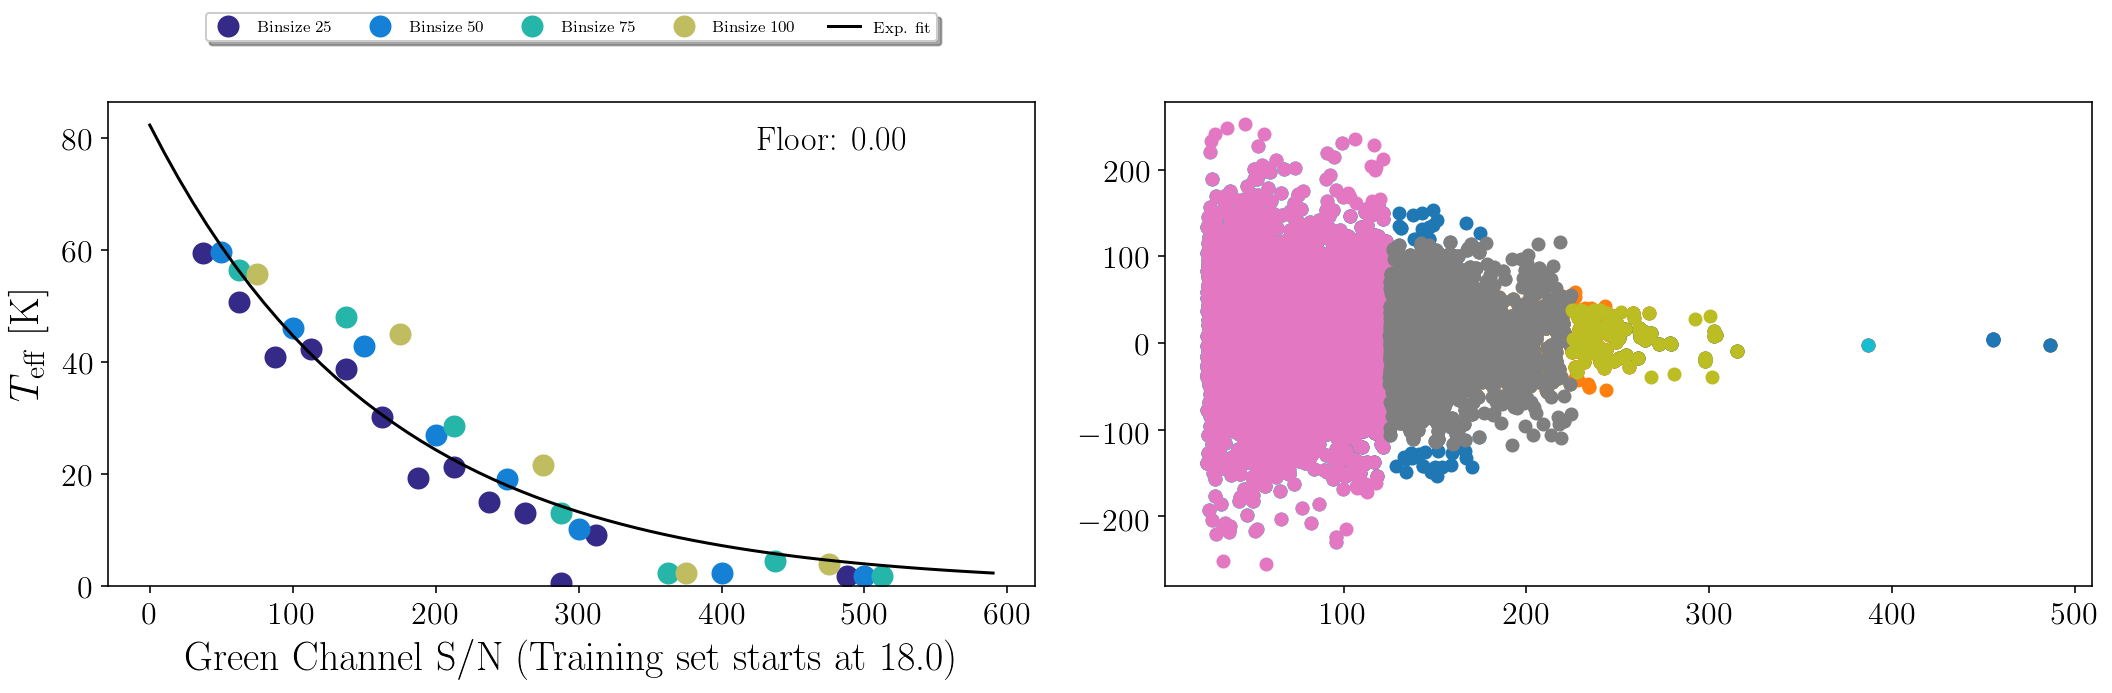

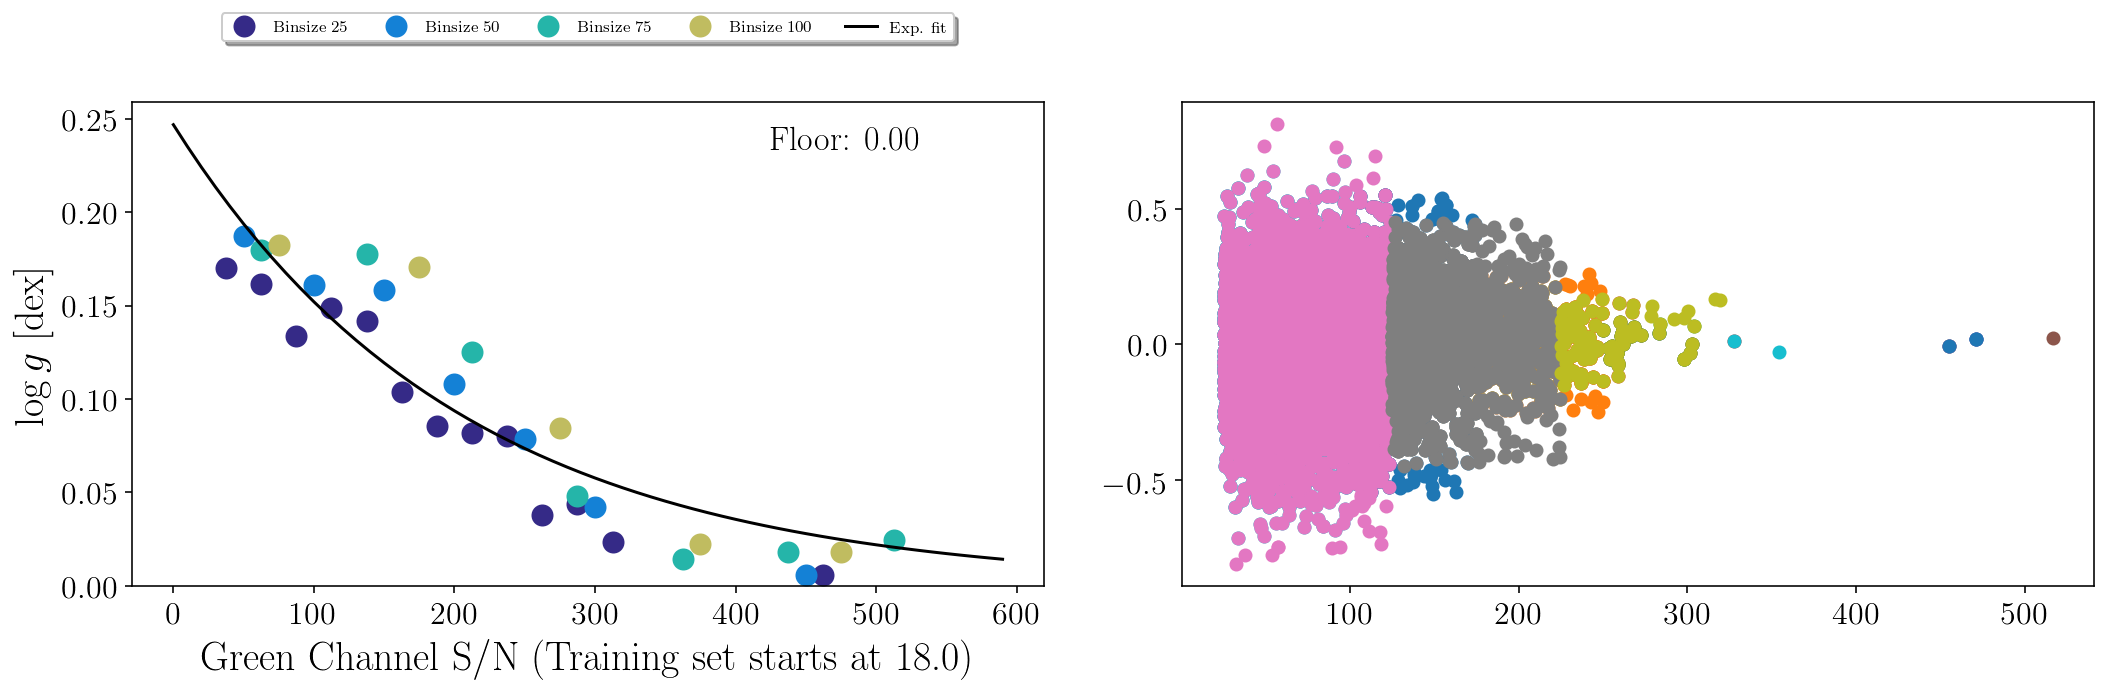

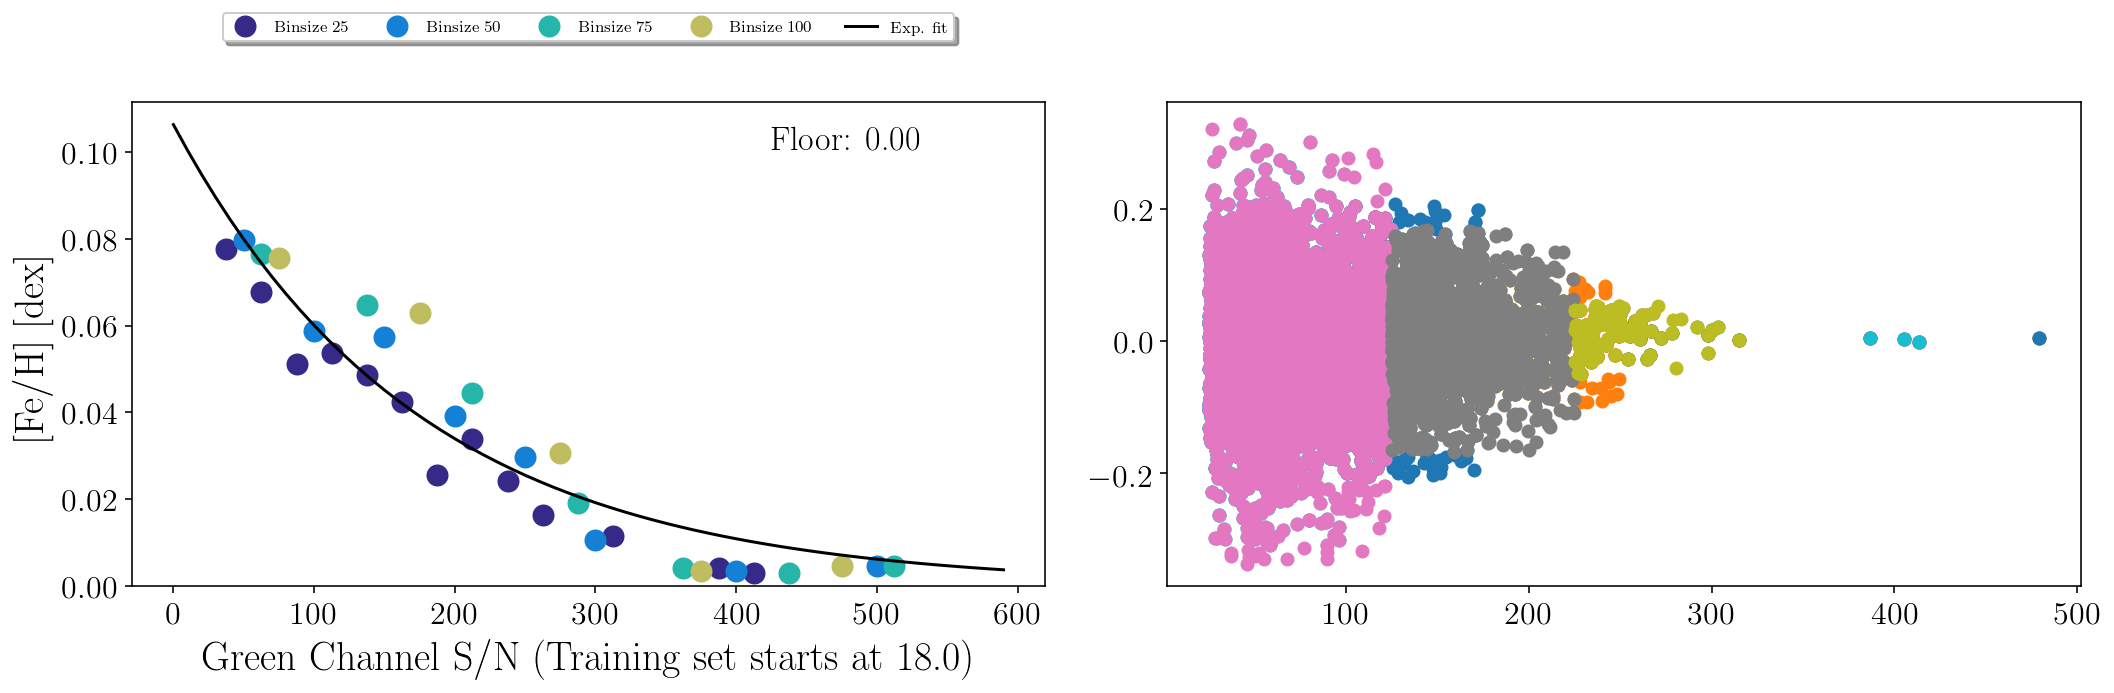

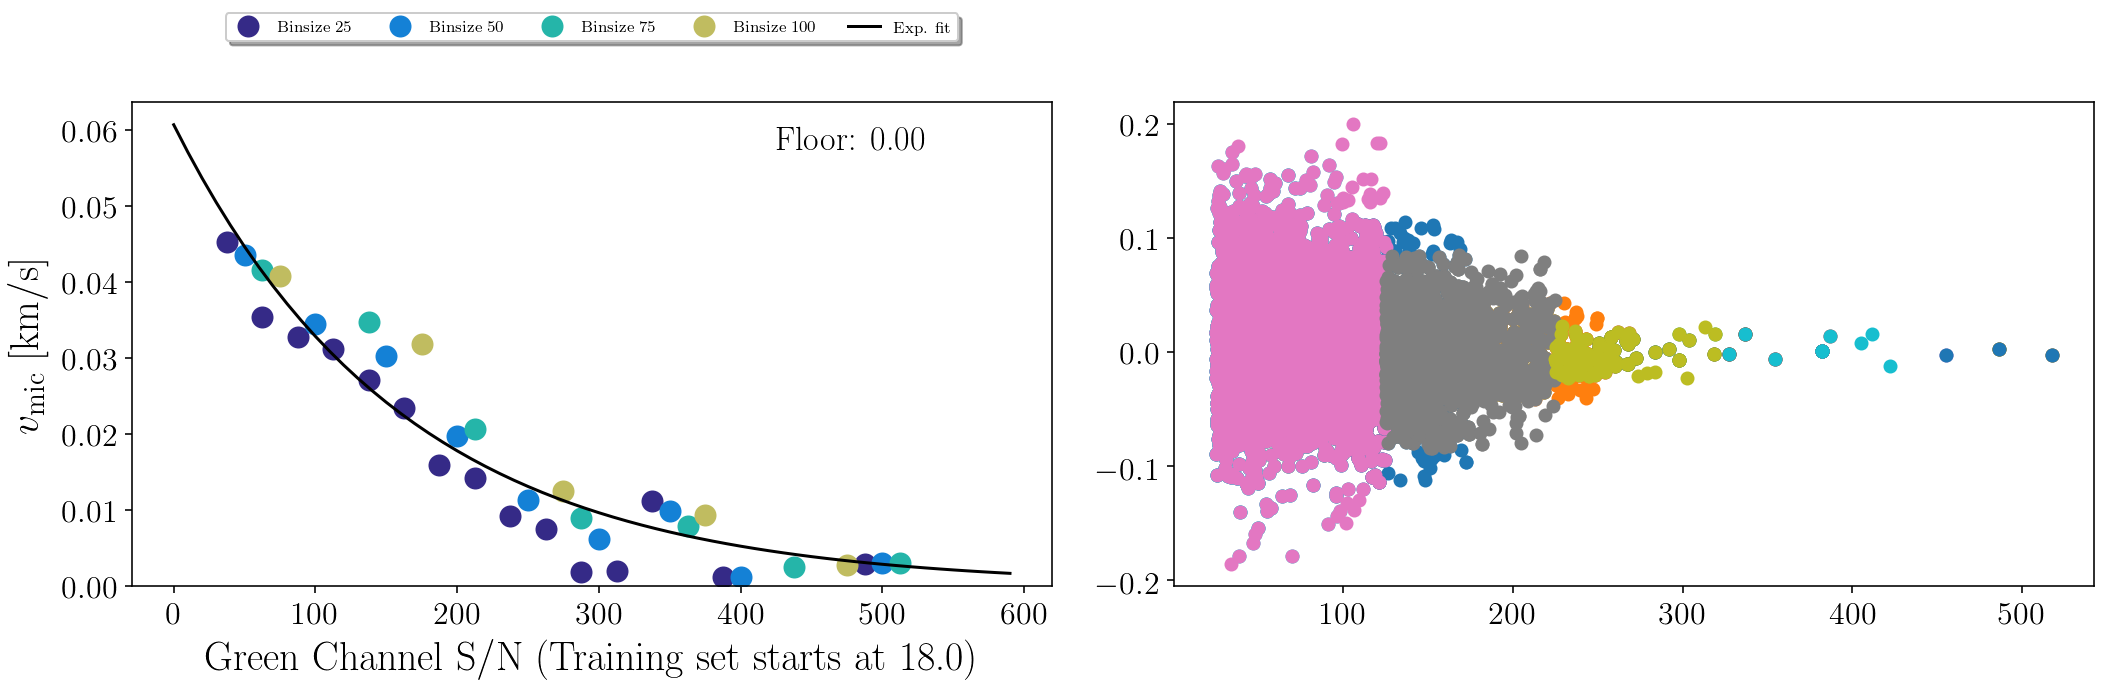

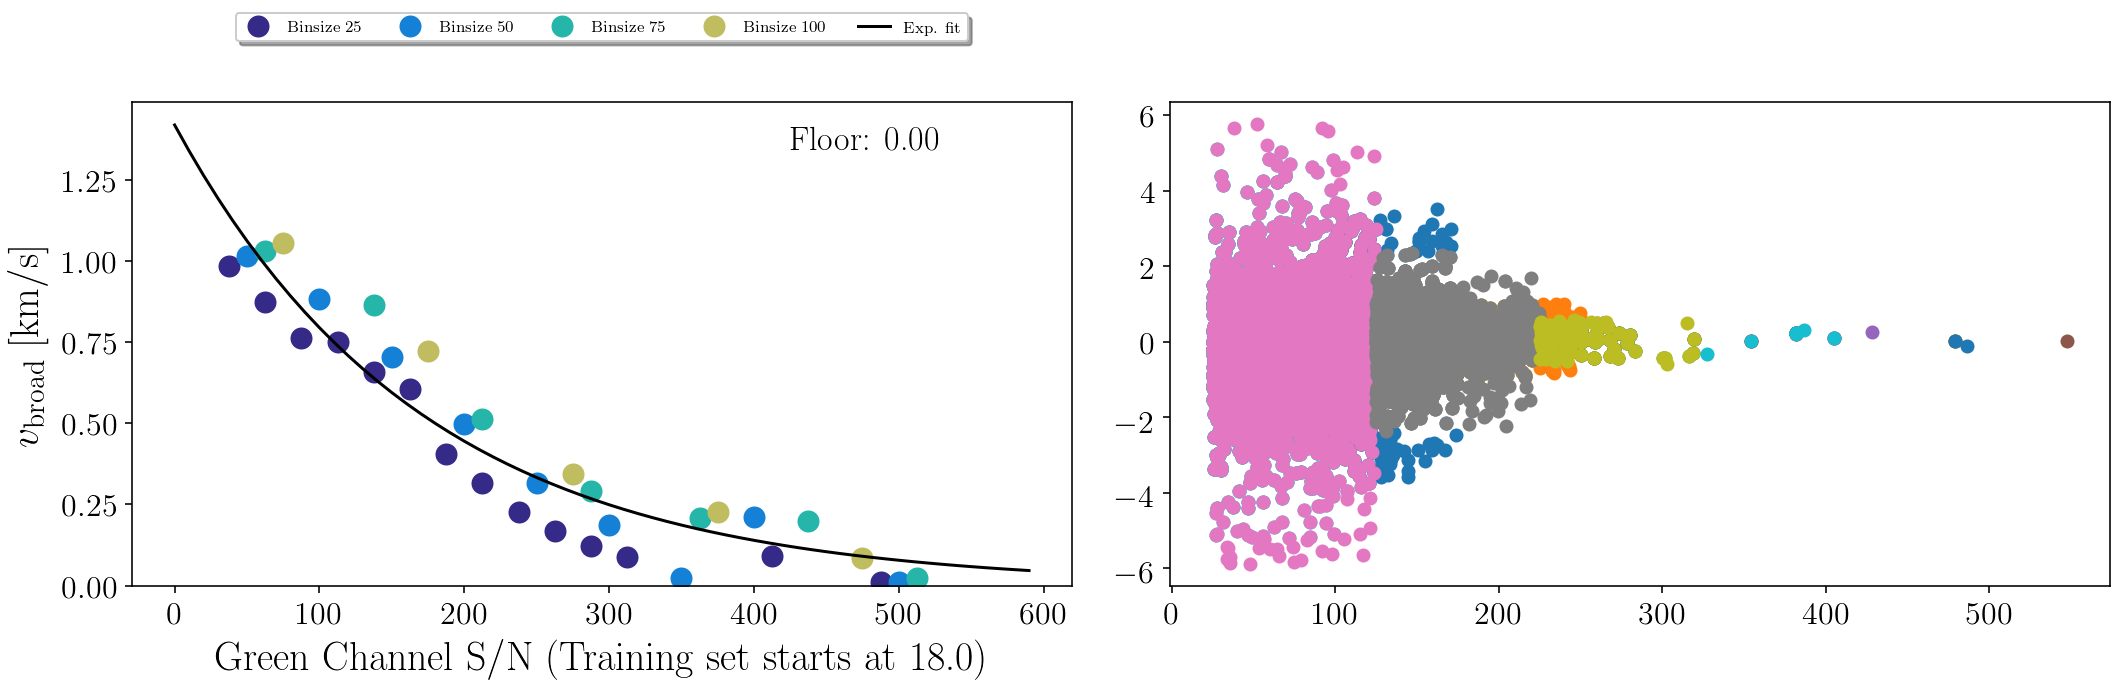

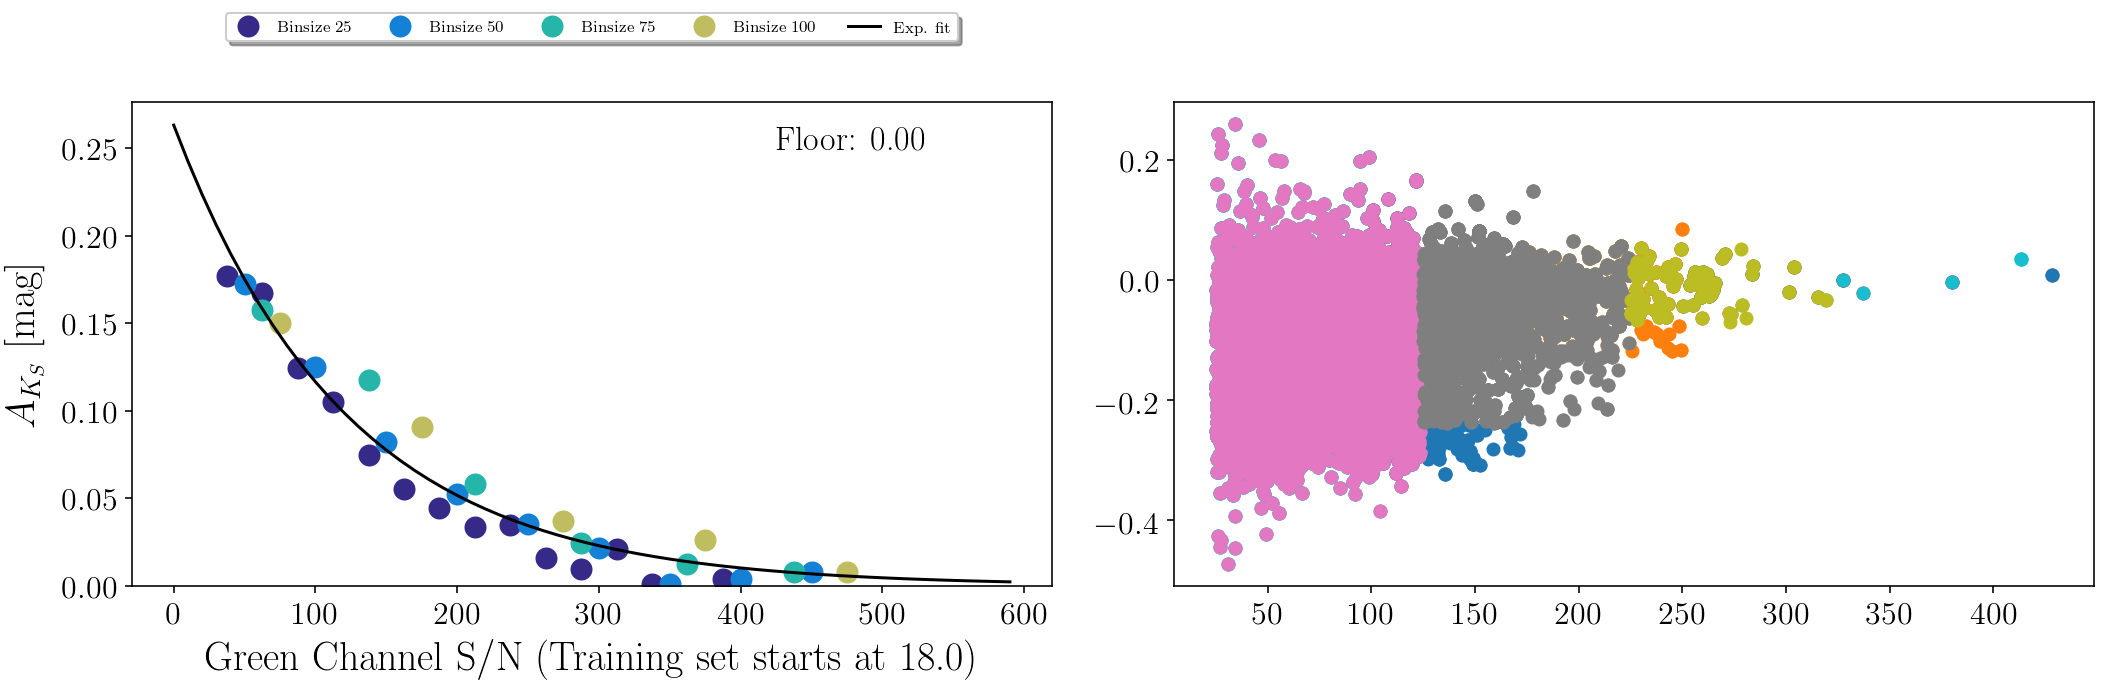

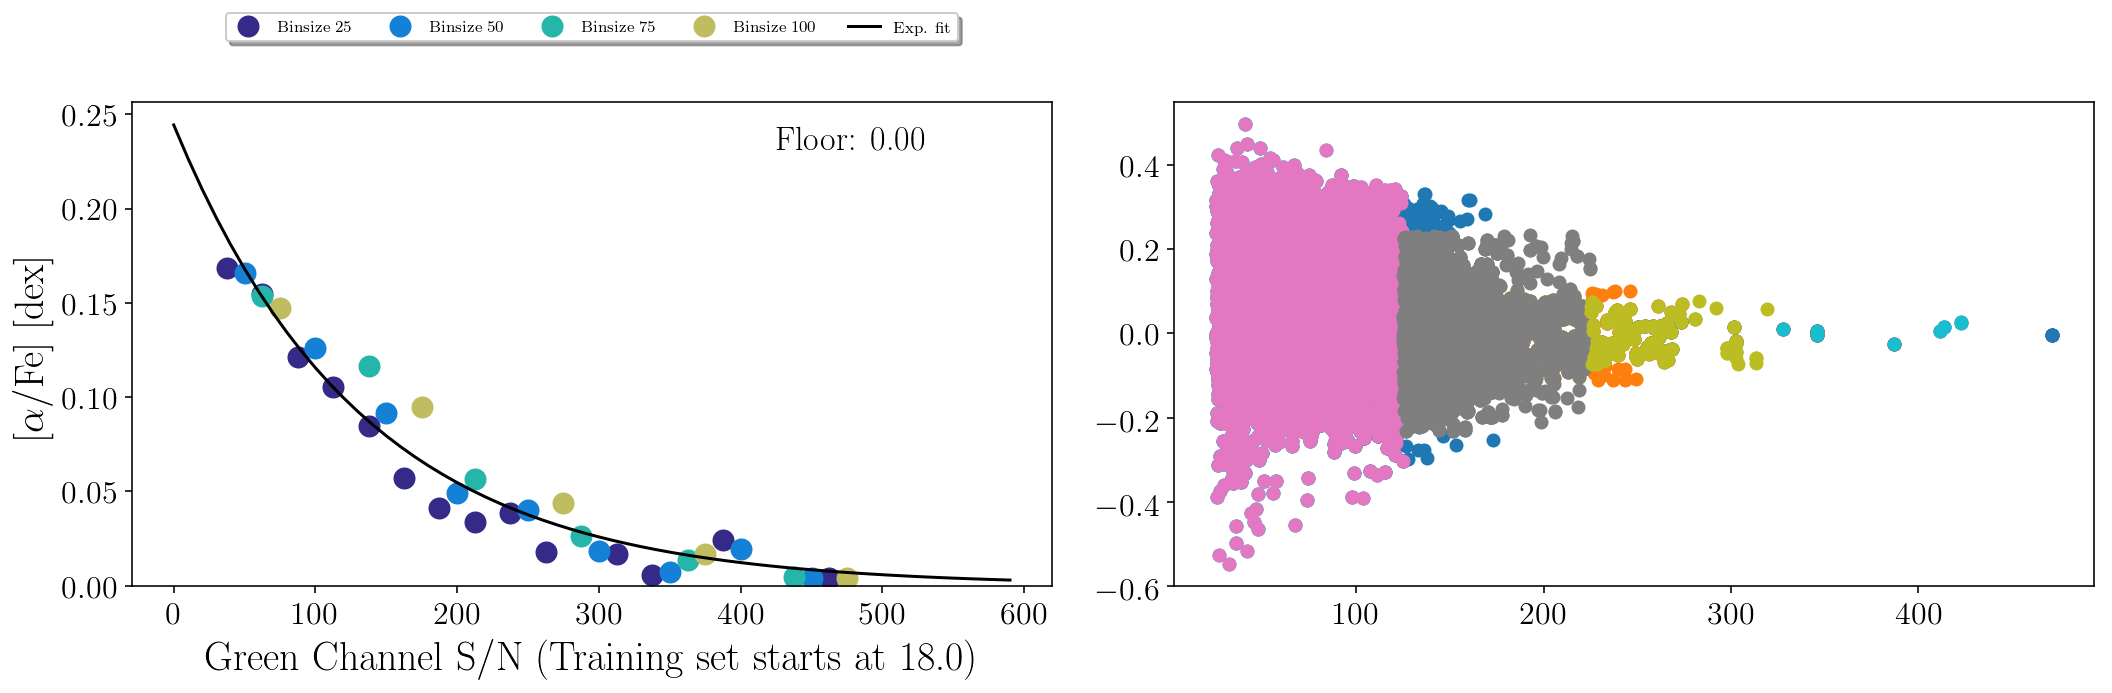

In [37]:
estimate_precision(sme_ts)

In [38]:
#sme_ts.export_fits()|

In [39]:
#sme_ts.cannon['Mg_abund_cannon']

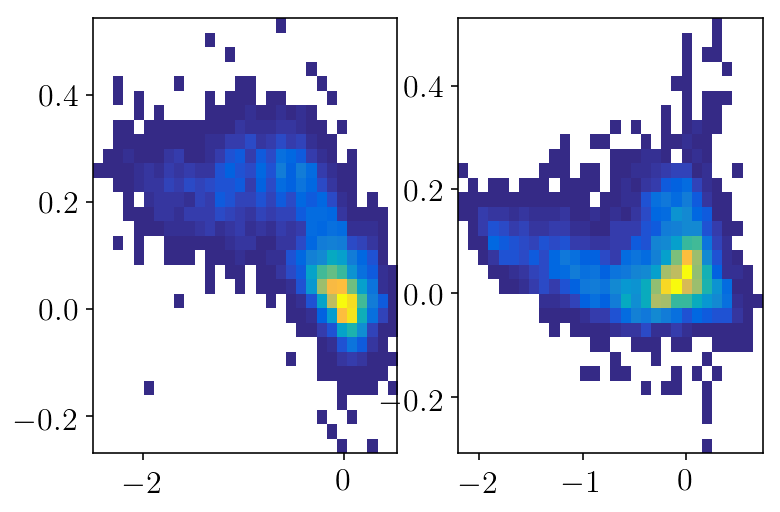

In [51]:
kwargs_hist2d = dict(cmap=parula, bins=30,cmin=1)
f,(ax1,ax2) = plt.subplots(1,2)
ax1.hist2d(sme_ts.cannon['Fe_H_sme'],sme_ts.cannon['Alpha_Fe_sme'],**kwargs_hist2d);
ax2.hist2d(sme_ts.cannon['Fe_H_cannon'],sme_ts.cannon['Alpha_Fe_cannon'],**kwargs_hist2d);

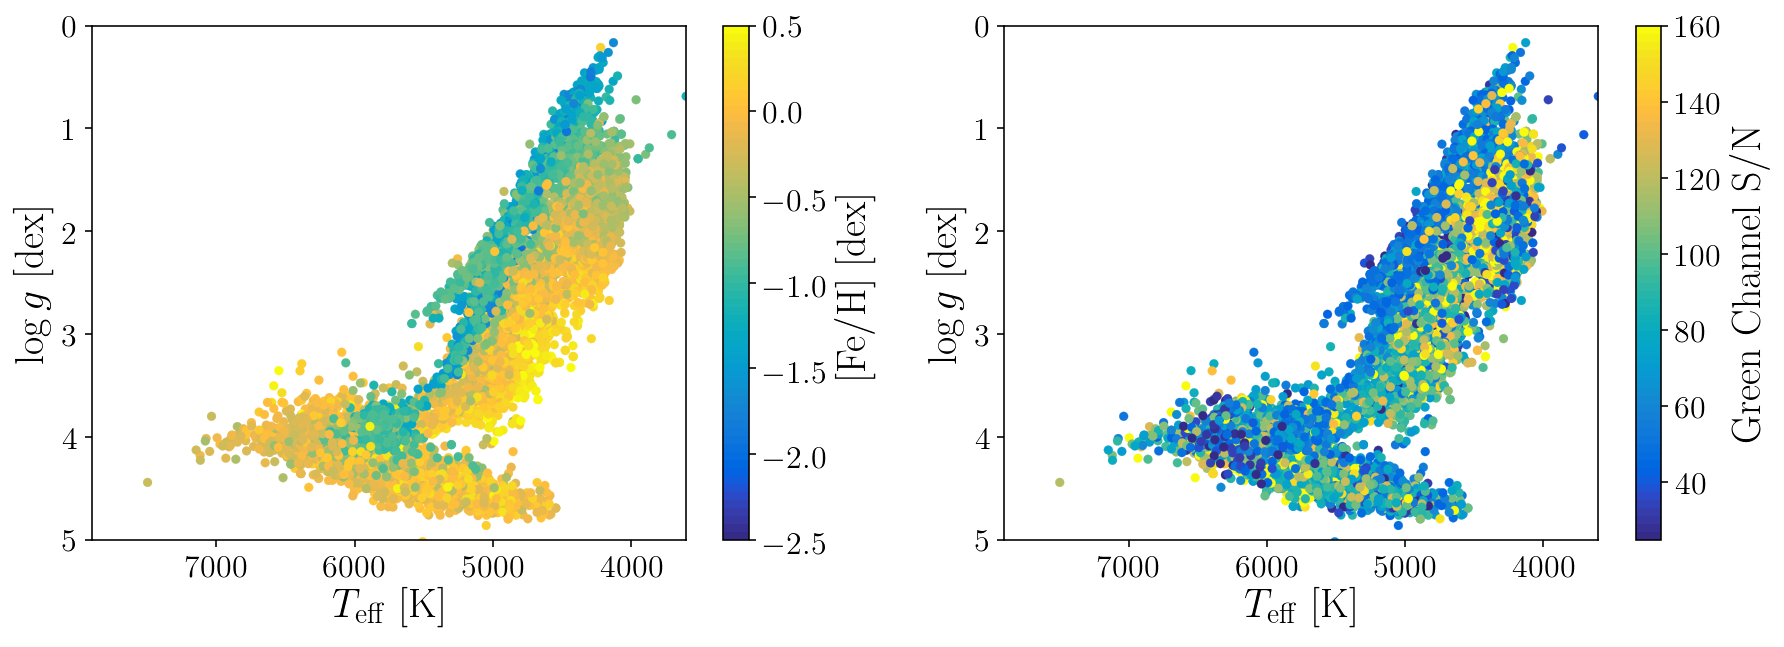

In [40]:
sme_ts.plot_HRD(savefig = localFilePath+'CANNON/'+reduction_DR+'/'+wg3_wg4_setup['version_cannon']+'/diagnostic_plots/'+wg3_wg4_setup['version_cannon']+'_'+wg3_wg4_setup['setup_cannon']+'_HRD')
#plt.close()

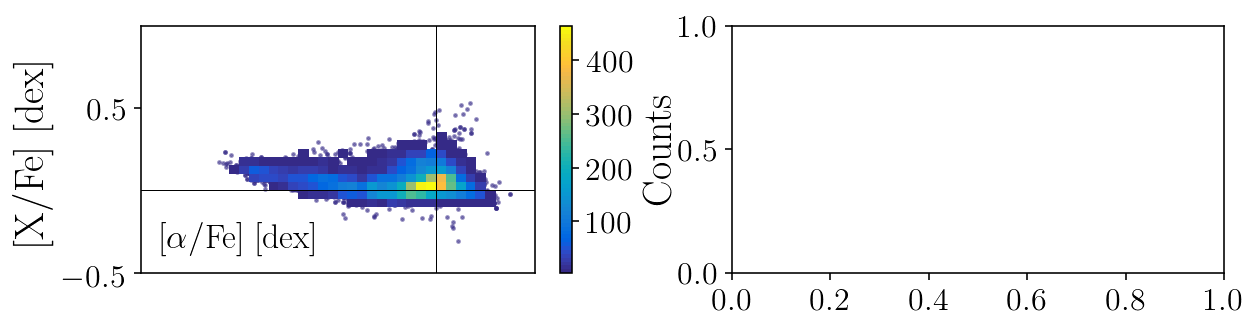

In [41]:
try:
    sme_ts.plot_alpha(savefig = localFilePath+'CANNON/'+reduction_DR+'/'+wg3_wg4_setup['version_cannon']+'/diagnostic_plots/'+wg3_wg4_setup['version_cannon']+wg3_wg4_setup['setup_cannon']+'_alpha')
except:
    pass
#plt.close()

Could not plot isochrones
Could not plot isochrones


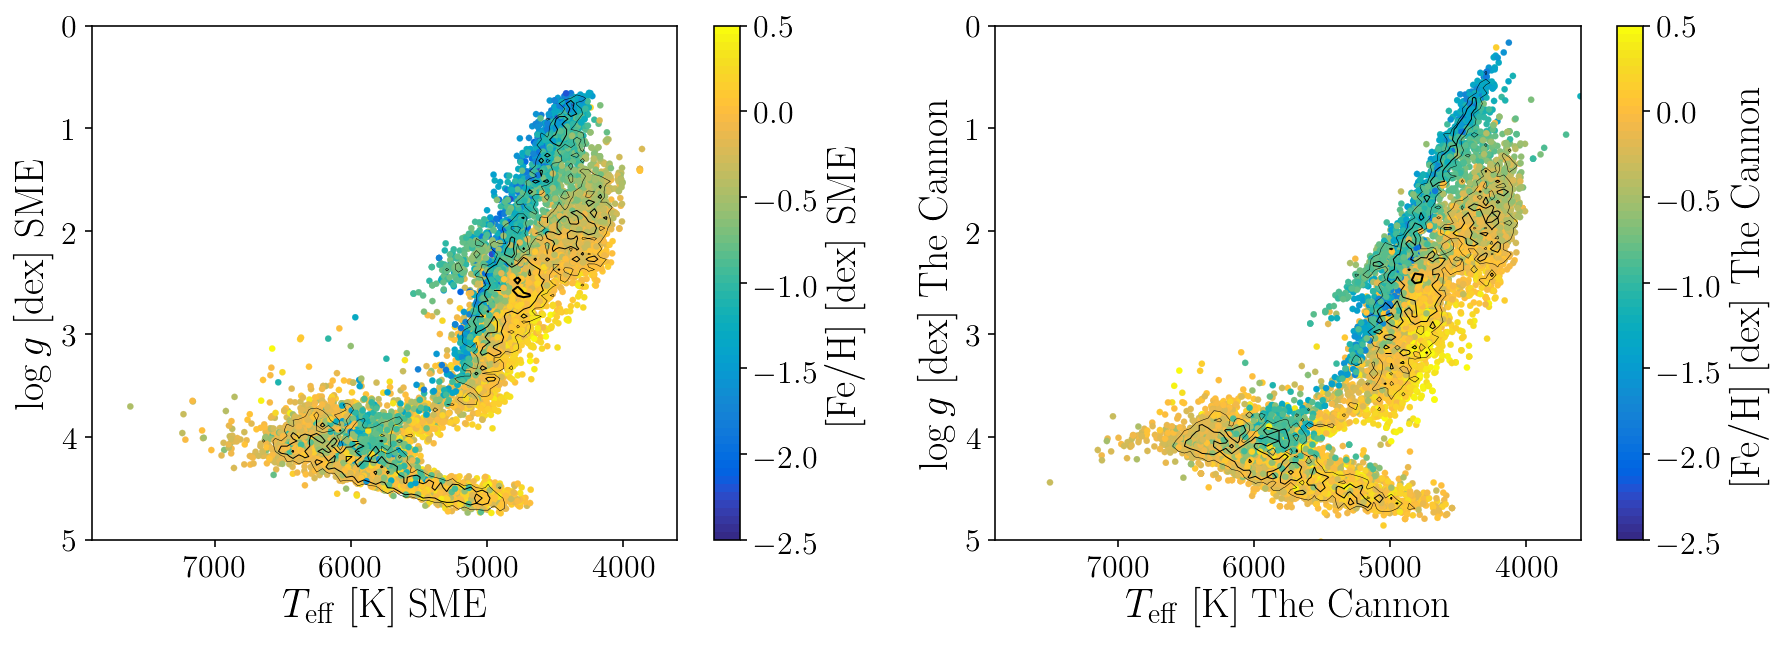

In [42]:
sme_ts.plot_SME_Cannon_comparisons(savefig = localFilePath+'CANNON/'+reduction_DR+'/'+wg3_wg4_setup['version_cannon']+'/diagnostic_plots/'+wg3_wg4_setup['version_cannon']+wg3_wg4_setup['setup_cannon'])
#plt.close()

In [30]:
# Convert IPYNB to PY

os.chdir(localFilePath+'TheGALAHCannon/')

convert_command = 'ipython nbconvert --to script Cannon_collect_trainingset.ipynb'
os.system(convert_command)

os.chdir(localFilePath)